In [9]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p = sns.color_palette
np.random.seed(0)

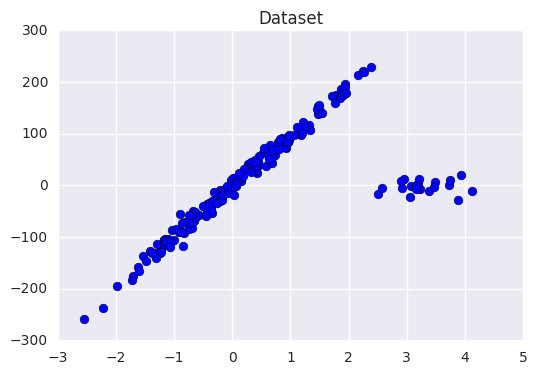

In [10]:
# Generate a dataset and plot it
X, y, coef = datasets.make_regression(n_samples=200, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)
X[:20] = 3 + 0.5 * np.random.normal(size=(20, 1))
y[:20] = -3 + 10 * np.random.normal(size=20)
plt.scatter(X, y, s=40, cmap=plt.cm.Spectral)
plt.title('Dataset')
plt.show()

# Linear Regression

$$f(x_i)=wx_i+b$$

$$(w^*,b^*)=\arg\max_{(w,b)}=\sum_{i=1}^{m}(f(x_i)-y_i)^2$$

$$E_{(w,b)}=\sum_{i=1}^{m}(y_i-wx_i-b)^2$$

$$\frac{\partial{E_{(w,b)}}}{\partial{w}}=2\left({w\sum_{i=1}^{m}{x^2_i}-\sum_{i=1}^{m}(y_i-b)x_i}\right)$$

$$\frac{\partial{E_{(w,b)}}}{\partial{w}}=2\left(mb-\sum_{i=1}^m(y_i-wx_i)\right)$$

### 闭式(closed-form)解
$$w=\frac{\sum_{i=1}^{m}y_i(x_i-\overline{x})}{\sum_{i=1}^{m}x_i^2-\frac1m(\sum_{i=1}^mx_i)^2}$$

$$b=\frac1m\sum_{i=1}^m(y_i-wx_i)$$

$$\overline{x}=\frac1m\sum_{i=1}^mx_i$$

### 向量化
$$\hat{w}^*=\arg\min_{\hat{w}}=(y-X\hat{w})^T(y-X\hat{w})$$

$$E_\hat{w}=(y-X\hat{w})^T(y-X\hat{w})$$

$$\frac{\partial{E_\hat{w}}}{\partial{\hat{w}}}=2X^T(X\hat{w}-y)$$

$$\frac{\partial{E_\hat{w}}}{\partial{\hat{w}}}=0$$

$$X^TX\hat{w}=X^Ty$$

# 多元线性回归
$$f(\widehat{x_i})=\widehat{x_i}^T(X^TX)^{-1}X^Ty$$

# 分析
当$X$不是列满秩，或者某些列之间的线性相关性比较大时，$X^TX$的行列式接近于0，即$X^TX$接近于奇异，计算$(X^TX)^{-1}$时误差会很大。此时传统的最小二乘法缺乏稳定性与可靠性。

当线性回归模型中存在多个相关变量时，它们的系数确定性变差并呈现高方差。比如说，在一个变量上的一个很大的正系数可能被在其相关变量上的类似大小的负系数抵消

In [11]:
model = linear_model.LinearRegression()
model.fit(X, y)
line_X = np.arange(-5, 5)
line_y = model.predict(line_X[:, np.newaxis])

In [21]:
model.residues_

F:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


953438.08572041802

In [22]:
model.rank_

1

In [23]:
model.singular_

array([ 19.31355139])

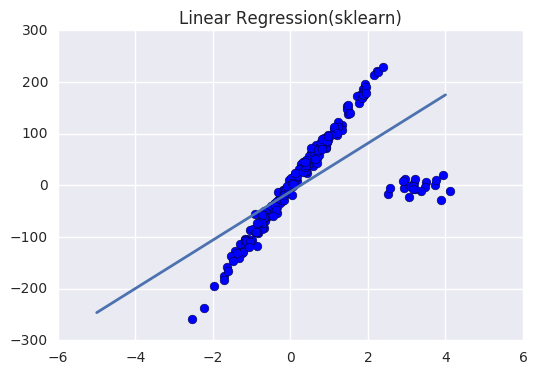

In [12]:
plt.plot(line_X, line_y, linestyle='-', linewidth=2,
         label='Linear regressor')
plt.scatter(X, y, s=40, cmap=plt.cm.Spectral)
plt.title('Linear Regression(sklearn)')
plt.show()

In [13]:
X = np.insert(X,X.shape[1],values=1,axis=1)  #For constant term
y = y[:,np.newaxis]

In [14]:
if np.linalg.det(X.T.dot(X)) == 0:
    print("singular error!")
else:
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [15]:
line_X = np.arange(-5, 5)[:, np.newaxis]
line_X = np.insert(line_X,line_X.shape[1],values=1,axis=1)
line_y = line_X.dot(w)

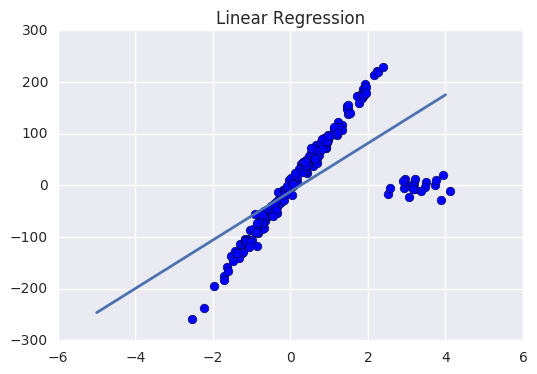

In [16]:
plt.plot(line_X[:,0], line_y, linestyle='-', linewidth=2,
         label='Linear regressor')
plt.scatter(X[:,0], y, s=40, cmap=plt.cm.Spectral)
plt.title('Linear Regression')
plt.show()